In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
satisfaccion = pd.DataFrame({'nivel':['alta','neutra','baja'],
                          'cantidad':[38,10,2]})
satisfaccion_tema = pd.DataFrame({'tema':['facturación', 'pago_parcial', 'financiacion', 'inconformidades_consumo_servicio', 'informacion_general'],
                                'satisfaccion_alta':[16,11,7,0,4],
                                'satisfaccion_neutra':[3,1,1,0,5],
                                'satisfaccion_baja':[0,0,0,2,0]})
satisfaccion_sentimiento = 

esfuerzo = pd.DataFrame({'nivel':['alto', 'neutro', 'bajo'],
                           'cantidad':[7,13,30]})
esfuerzo_tema = pd.DataFrame({'tema':['facturación', 'pago_parcial', 'financiacion', 'inconformidades_consumo_servicio', 'informacion_general'],
                                'esfuerzo_alto':[0,2,1,3,1],
                                'esfuerzo_medio':[3,3,1,2,4],
                                'esfuerzo_bajo':[12,11,5,1,1]})


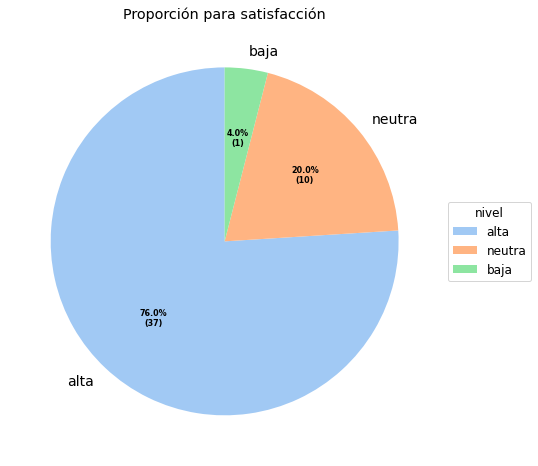

In [117]:
colors = sns.color_palette('pastel')

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:1.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(10,8))

wedges, texts, autotexts = ax.pie(satisfaccion['cantidad'], labels=satisfaccion.nivel,
                    autopct=lambda pct: func(pct, satisfaccion['cantidad']), textprops={'fontsize':14},
                                  colors=colors, startangle=90)

ax.legend(wedges, satisfaccion['nivel'],
          title ="nivel",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Proporción para satisfacción")
plt.savefig('satisfaccion.png')

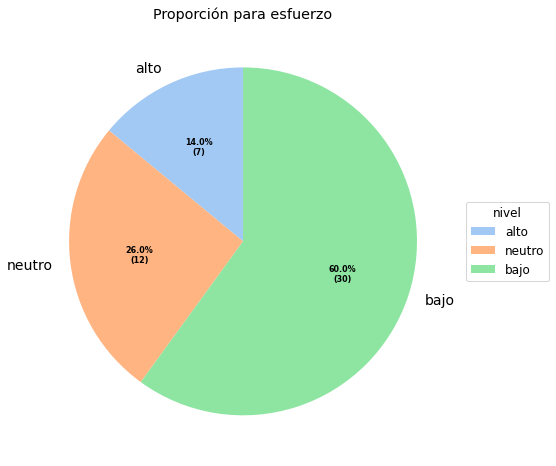

In [118]:
colors = sns.color_palette('pastel')

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:1.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(10,8))

wedges, texts, autotexts = ax.pie(esfuerzo['cantidad'], labels=esfuerzo.nivel,
                    autopct=lambda pct: func(pct, esfuerzo['cantidad']), textprops={'fontsize':14},
                                  colors=colors, startangle=90)

ax.legend(wedges, esfuerzo['nivel'],
          title ="nivel",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Proporción para esfuerzo")
plt.savefig('esfuerzo.png')

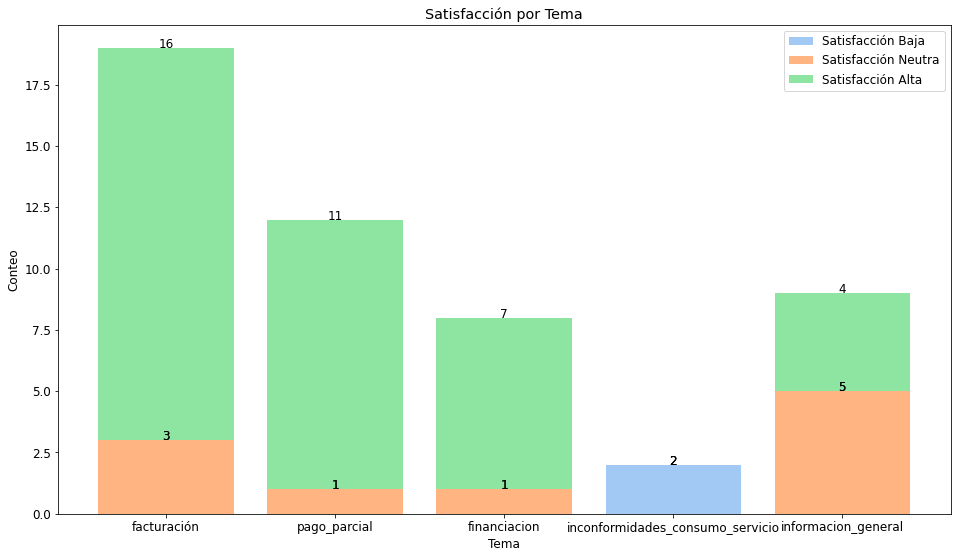

In [109]:
# set the figure size
import matplotlib.patches as mpatches

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            if value != '0':
                ax.text(_x, _y, value, ha="center") 
            else:
                ax.text(_x, _y, '', ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

colors = sns.color_palette('pastel')

fig, ax =  plt.subplots(figsize=(16,9))

ax.bar(x=satisfaccion_tema.tema,
        height=satisfaccion_tema.satisfaccion_baja.values,
        bottom=0,
        color=colors[0],
        label='Satisfacción Baja')
show_values_on_bars(ax)

ax.bar(x=satisfaccion_tema.tema,
        height=satisfaccion_tema.satisfaccion_neutra.values,
        bottom=satisfaccion_tema.satisfaccion_baja.values,
        color=colors[1],
        label='Satisfacción Neutra')
show_values_on_bars(ax)

ax.bar(x=satisfaccion_tema.tema,
        height=satisfaccion_tema.satisfaccion_alta.values,
        bottom=satisfaccion_tema.satisfaccion_baja.values+ \
                satisfaccion_tema.satisfaccion_neutra.values,
        color=colors[2],
        label='Satisfacción Alta')
show_values_on_bars(ax)

ax.set_ylabel('Conteo')
ax.set_xlabel('Tema')
ax.set_title('Satisfacción por Tema')
ax.legend()
#plt.savefig('satisfaccion_tema.png')

plt.show()

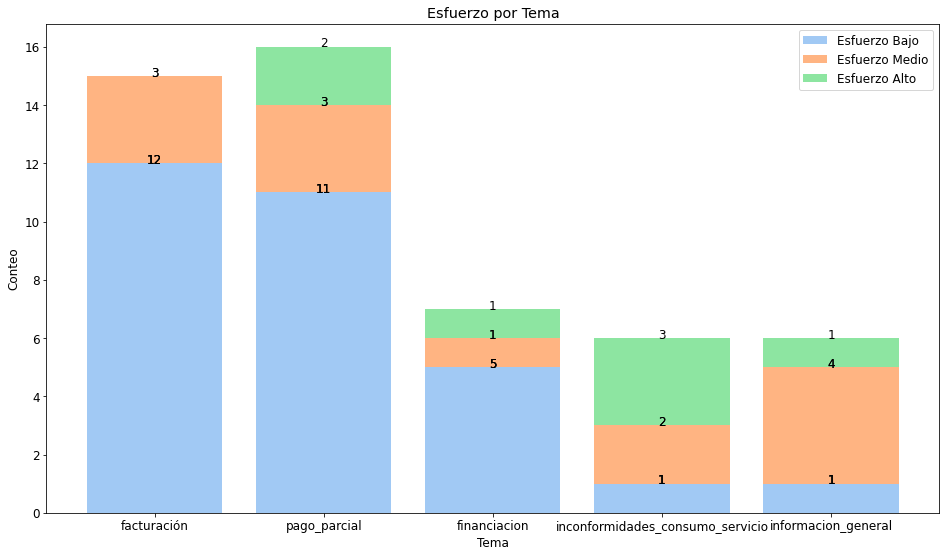

In [112]:
# set the figure size

colors = sns.color_palette('pastel')

fig, ax =  plt.subplots(figsize=(16,9))

ax.bar(x=esfuerzo_tema.tema,
        height=esfuerzo_tema.esfuerzo_bajo.values,
        bottom=0,
        color=colors[0],
        label='Esfuerzo Bajo')
show_values_on_bars(ax)

ax.bar(x=esfuerzo_tema.tema,
        height=esfuerzo_tema.esfuerzo_medio.values,
        bottom=esfuerzo_tema.esfuerzo_bajo.values,
        color=colors[1],
        label='Esfuerzo Medio')
show_values_on_bars(ax)

ax.bar(x=esfuerzo_tema.tema,
        height=esfuerzo_tema.esfuerzo_alto.values,
        bottom=esfuerzo_tema.esfuerzo_bajo.values+ \
                esfuerzo_tema.esfuerzo_medio.values,
        color=colors[2],
        label='Esfuerzo Alto')
show_values_on_bars(ax)

ax.set_ylabel('Conteo')
ax.set_xlabel('Tema')
ax.set_title('Esfuerzo por Tema')
ax.legend()
#plt.savefig('esfuerzo_tema.png')

plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def plot_wordcloud(text):
    '''
    function to plot a wordcloud only for a text
    args:
    text: {str}. any text.
    '''

    _, words = get_mf_nouns(text)
    if len(words)<2:
        join_nouns = ' '.join(words[0])
    else:
        join_nouns = ''
        for row in words:
            if row[0] not in stop_words:
                join_nouns = join_nouns + ' ' + ' '.join(row)
            else:
                pass
            
    wordcloud = WordCloud(max_font_size=50,
                          max_words=50,
                          collocations=False, 
                          background_color="white").generate(join_nouns)
    
    return wordcloud

In [ ]:
#graficar nube de palabras para un texto

# crear un sólo texto que contenga todos los registros asociados a una etiqueta
texto_esfuerzo_alto = ' '.join([text for text in df[df['esfuerzo']=='Esfuerzo_alto'].customer.iloc[:50]])

# graficar la nube de palabras
wordcloud = plot_wordcloud(texto_esfuerzo_alto)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()